<a href="https://colab.research.google.com/github/MouhabDouzi/Projects/blob/main/portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd

# List of ticker symbols for assets (e.g., stocks)
tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA']

# Download historical data (e.g., 1 year of daily data)
data = yf.download(tickers, start="2022-01-01", end="2023-01-01")

# Display the first few rows of the data
print(data.head())


[*********************100%***********************]  5 of 5 completed


Price        Adj Close                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA   
Date                                                                     
2022-01-03  179.076584  170.404495  144.467789  326.287720  399.926666   
2022-01-04  176.803818  167.522003  143.877930  320.692810  383.196655   
2022-01-05  172.100830  164.356995  137.277359  308.382111  362.706665   
2022-01-06  169.227905  163.253998  137.249954  305.945312  354.899994   
2022-01-07  169.395187  162.554001  136.522095  306.101227  342.320007   

Price            Close                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA  ...   
Date                                                                    ...   
2022-01-03  182.009995  170.404495  144.991501  334.750000  399.926666  ...   
2022-01-04  179.699997  167.522003  144.399506  329.010010  383.196655  ...   
2022-01-05  

In [2]:
# Calculate daily returns for each asset
returns = data['Adj Close'].pct_change()

# Drop the missing values (NaNs)
returns = returns.dropna()

# Display the first few rows of the returns
print(returns.head())


Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2022-01-04 -0.012692 -0.016916 -0.004083 -0.017147 -0.041833
2022-01-05 -0.026600 -0.018893 -0.045876 -0.038388 -0.053471
2022-01-06 -0.016693 -0.006711 -0.000200 -0.007902 -0.021523
2022-01-07  0.000989 -0.004288 -0.005303  0.000510 -0.035447
2022-01-10  0.000116 -0.006570  0.012061  0.000732  0.030342


In [3]:
import numpy as np
import cvxopt

# Calculate the covariance matrix of returns
cov_matrix = returns.cov()

# Calculate expected returns (mean of daily returns)
mean_returns = returns.mean()

# Number of assets
n_assets = len(tickers)

# Convert the expected returns and covariance matrix to the right format
mean_returns = np.array(mean_returns)
cov_matrix = np.array(cov_matrix)

# Define the function for the portfolio performance (return and risk)
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(weights * mean_returns)
    risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, risk

# Portfolio optimization function (using cvxopt for convex optimization)
def optimize_portfolio(mean_returns, cov_matrix):
    n = len(mean_returns)
    P = cvxopt.matrix(cov_matrix)
    q = cvxopt.matrix(np.zeros(n))
    G = cvxopt.matrix(-np.eye(n))
    h = cvxopt.matrix(np.zeros(n))
    A = cvxopt.matrix(1.0, (1, n))
    b = cvxopt.matrix(1.0)

    # Solve for the optimal portfolio weights
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    weights = np.array(solution['x']).flatten()

    return weights

# Get the optimized portfolio weights
optimal_weights = optimize_portfolio(mean_returns, cov_matrix)

# Display the optimized portfolio weights
print("Optimal Portfolio Weights: ", optimal_weights)


     pcost       dcost       gap    pres   dres
 0:  2.9862e-04 -9.9982e-01  1e+00  0e+00  3e+00
 1:  2.9859e-04 -9.8164e-03  1e-02  2e-16  3e-02
 2:  2.9534e-04  8.6192e-05  2e-04  9e-17  6e-04
 3:  2.4927e-04  2.1741e-04  3e-05  8e-17  4e-05
 4:  2.3131e-04  2.2653e-04  5e-06  8e-17  2e-19
 5:  2.2848e-04  2.2822e-04  3e-07  1e-16  1e-19
 6:  2.2833e-04  2.2832e-04  7e-09  6e-17  2e-19
Optimal solution found.
Optimal Portfolio Weights:  [4.61963166e-01 1.44130569e-05 4.39103192e-02 4.94103971e-01
 8.13125495e-06]


In [4]:
# Calculate the performance of the optimized portfolio
portfolio_return, portfolio_risk = portfolio_performance(optimal_weights, mean_returns, cov_matrix)

# Calculate the Sharpe ratio (assuming risk-free rate = 0 for simplicity)
sharpe_ratio = portfolio_return / portfolio_risk

print(f"Optimized Portfolio Return: {portfolio_return}")
print(f"Optimized Portfolio Risk: {portfolio_risk}")
print(f"Sharpe Ratio: {sharpe_ratio}")


Optimized Portfolio Return: -0.0010882010254512726
Optimized Portfolio Risk: 0.021369384139009646
Sharpe Ratio: -0.050923368608680214


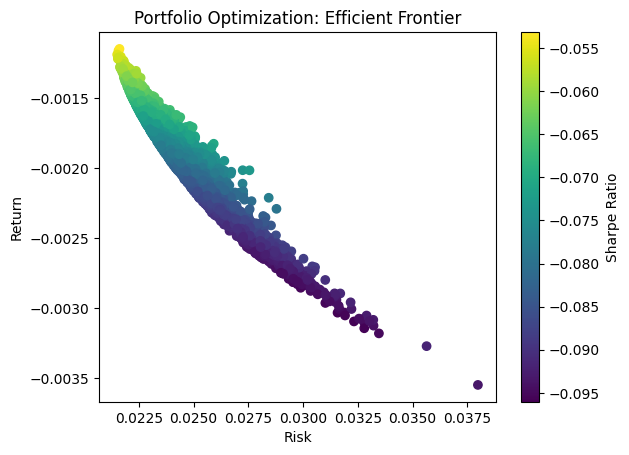

In [5]:
import matplotlib.pyplot as plt

# Generate random portfolio weights
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)

    portfolio_return, portfolio_risk = portfolio_performance(weights, mean_returns, cov_matrix)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_risk
    results[2,i] = portfolio_return / portfolio_risk

# Plot the efficient frontier
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Portfolio Optimization: Efficient Frontier')
plt.show()
